# Employee Attrition Prediction



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### read CSV

In [2]:
df = pd.read_csv('hr-employee-attrition-with-null.csv')

### Dataset statistic

In [3]:
df.describe()

,Unnamed: 0,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1176.000000,1176.000000,1176.00000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,734.500000,37.134354,798.875850,9.37500,2.920918,1.0,1031.399660,2.733844,65.821429,2.728741,...,2.694728,80.0,0.752551,11.295068,2.787415,2.770408,7.067177,4.290816,2.159014,4.096939
std,424.496761,9.190317,406.957684,8.23049,1.028796,0.0,601.188955,1.092992,20.317323,0.705280,...,1.093660,0.0,0.822550,7.783376,1.290507,0.705004,6.127836,3.630901,3.163524,3.537393
min,0.000000,18.000000,102.000000,1.00000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,30.000000,457.750000,2.00000,2.000000,1.0,494.750000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,36.000000,798.500000,7.00000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,43.000000,1168.250000,15.00000,4.000000,1.0,1562.250000,4.000000,84.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,1469.000000,60.000000,1499.000000,29.00000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [4]:
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41.0,Yes,Travel_Rarely,NaN,NaN,1.0,NaN,Life Sciences,1.0,...,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,1,NaN,No,NaN,279.0,Research & Development,NaN,NaN,Life Sciences,1.0,...,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,2,37.0,Yes,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,3,NaN,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,...,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,...,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


### Feature transformation

In [5]:
df.loc[df["Attrition"] == "No", "Attrition"] = 0.0
df.loc[df["Attrition"] == "Yes", "Attrition"] = 1.0
string_categorical_col = ['Department', 'Attrition', 'BusinessTravel', 'EducationField', 'Gender', 'JobRole',
                              'MaritalStatus', 'Over18', 'OverTime']

# ENCODE STRING COLUMNS TO CATEGORICAL COLUMNS
for col in string_categorical_col:
    # INSERT CODE HERE
    df[col] = pd.Categorical(df[col]).codes

# HANDLE NULL NUMBERS
# INSERT CODE HERE

# Drop unnecessary columns
df = df.loc[:, ~df.columns.isin(['EmployeeNumber', 'Unnamed: 0', 'EmployeeCount', 'StandardHours', 'Over18'])]

In [6]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1,2,NaN,-1,1.0,NaN,1,2.0,0,...,NaN,1.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,NaN,0,-1,279.0,1,NaN,NaN,1,3.0,1,...,NaN,4.0,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,37.0,1,-1,1373.0,-1,2.0,2.0,-1,NaN,1,...,3.0,NaN,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,NaN,0,1,1392.0,1,3.0,4.0,1,NaN,0,...,3.0,3.0,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,27.0,0,2,591.0,1,2.0,1.0,3,1.0,1,...,3.0,4.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,0,1,884.0,1,NaN,NaN,3,3.0,1,...,3.0,3.0,1.0,17.0,3.0,3.0,5.0,2.0,0.0,3.0
1466,39.0,0,2,613.0,-1,6.0,NaN,3,4.0,-1,...,3.0,NaN,NaN,9.0,5.0,3.0,7.0,7.0,1.0,7.0
1467,27.0,0,-1,155.0,1,4.0,3.0,1,2.0,1,...,NaN,2.0,1.0,6.0,0.0,3.0,6.0,NaN,0.0,3.0
1468,49.0,0,1,1023.0,2,2.0,3.0,-1,4.0,1,...,3.0,4.0,0.0,17.0,NaN,2.0,9.0,6.0,0.0,8.0


###  Spliting data into train and test

In [7]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, 
                                     test_size=0.1, 
                                     stratify=df["Attrition"], 
                                     random_state=7)

In [8]:
df_train

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1024,47.0,0,2,NaN,1,2.0,4.0,-1,NaN,0,...,3.0,2.0,2.0,26.0,2.0,4.0,NaN,NaN,5.0,6.0
93,46.0,0,1,638.0,1,1.0,3.0,-1,3.0,1,...,3.0,3.0,1.0,21.0,5.0,2.0,10.0,9.0,NaN,NaN
525,24.0,1,2,693.0,2,3.0,2.0,-1,1.0,0,...,3.0,1.0,NaN,4.0,3.0,NaN,NaN,2.0,2.0,0.0
1450,35.0,0,2,1146.0,0,NaN,NaN,-1,3.0,0,...,NaN,NaN,0.0,9.0,2.0,3.0,9.0,0.0,1.0,7.0
922,44.0,0,2,1199.0,1,4.0,2.0,1,3.0,1,...,3.0,4.0,2.0,26.0,4.0,2.0,NaN,NaN,NaN,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,NaN,1,1,NaN,-1,26.0,4.0,-1,3.0,0,...,3.0,3.0,0.0,9.0,5.0,2.0,6.0,3.0,0.0,1.0
1336,55.0,0,2,836.0,1,2.0,NaN,5,2.0,-1,...,4.0,2.0,1.0,19.0,2.0,4.0,5.0,NaN,NaN,NaN
880,32.0,0,1,NaN,-1,NaN,3.0,4,3.0,0,...,4.0,3.0,1.0,2.0,2.0,3.0,NaN,2.0,2.0,NaN
237,52.0,0,0,771.0,2,2.0,NaN,-1,1.0,1,...,NaN,NaN,0.0,33.0,NaN,4.0,33.0,7.0,15.0,12.0


In [9]:
df_test

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1239,31.0,0,1,163.0,1,24.0,1.0,5,NaN,0,...,4.0,NaN,0.0,9.0,3.0,2.0,5.0,4.0,NaN,4.0
1014,NaN,0,2,NaN,1,8.0,5.0,1,NaN,0,...,3.0,3.0,0.0,9.0,3.0,4.0,3.0,2.0,NaN,0.0
259,31.0,1,1,307.0,-1,29.0,2.0,3,NaN,1,...,NaN,2.0,NaN,6.0,2.0,4.0,5.0,4.0,1.0,4.0
759,45.0,0,2,NaN,0,24.0,4.0,3,2.0,-1,...,3.0,1.0,0.0,6.0,3.0,3.0,6.0,NaN,0.0,4.0
1443,42.0,0,2,300.0,-1,2.0,3.0,1,NaN,1,...,NaN,1.0,0.0,24.0,2.0,2.0,22.0,6.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,34.0,0,2,1111.0,2,8.0,2.0,1,3.0,-1,...,3.0,2.0,1.0,6.0,1.0,3.0,3.0,2.0,NaN,NaN
476,NaN,0,2,823.0,1,17.0,2.0,4,4.0,1,...,4.0,4.0,NaN,1.0,2.0,3.0,NaN,0.0,0.0,NaN
219,54.0,0,2,1147.0,-1,3.0,3.0,-1,4.0,0,...,3.0,4.0,1.0,NaN,4.0,3.0,NaN,NaN,NaN,NaN
466,41.0,0,2,1276.0,2,2.0,5.0,-1,2.0,0,...,NaN,2.0,1.0,22.0,NaN,3.0,18.0,16.0,NaN,NaN


### Display histogram of each feature

In [10]:
def display_histogram(df, col_name, n_bin=40):
    # Filter the DataFrame for the specified column, dropping NaN values
    col_no_nan = df[col_name].dropna()

    # Bin the data into equally spaced bins
    hist, bin_edge = np.histogram(col_no_nan, bins=n_bin)

    # Plot the histogram
    plt.fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2), facecolor='steelblue')
    plt.title(f"Histogram for {col_name}")
    plt.xlabel(col_name)
    plt.ylabel("Frequency")
    plt.show()

### T4. Observe the histogram for Age, MonthlyIncome and DistanceFromHome. How many bins have zero counts? Do you think this is a good discretization? Why?

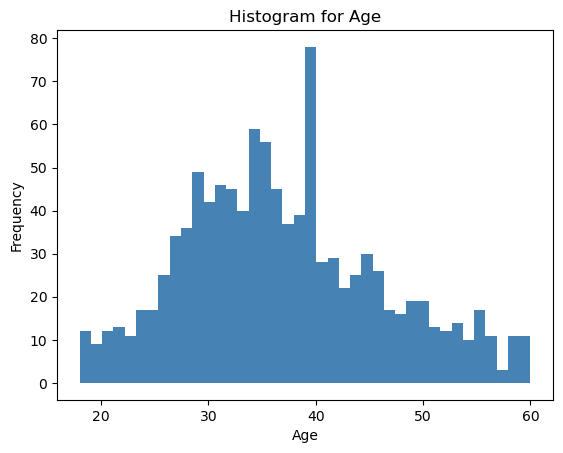

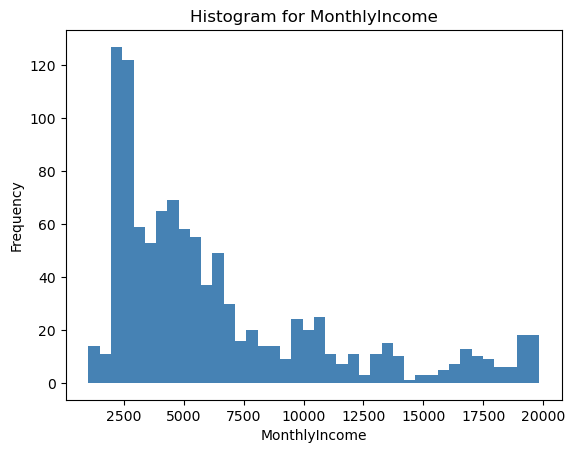

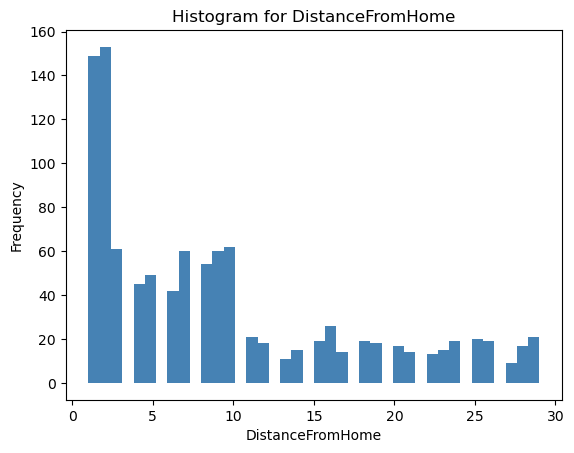

In [11]:
# by Feature
display_histogram(df_train, "Age")
display_histogram(df_train, "MonthlyIncome")
display_histogram(df_train, "DistanceFromHome")

**How many bins have zero counts?**

In [12]:
def count_zero_bins(df, col_name, n_bin=40):
    # Filter the DataFrame for the specified column, dropping NaN values
    col_no_nan = df[col_name].dropna()

    # Bin the data into equally spaced bins
    hist, bin_edge = np.histogram(col_no_nan, bins=n_bin)

    # Count the number of bins with zero counts
    zero_bins_count = np.count_nonzero(hist == 0)

    return zero_bins_count

# Calculate
zero_bins_age = count_zero_bins(df_train, "Age")
zero_bins_income = count_zero_bins(df_train, "MonthlyIncome")
zero_bins_distance = count_zero_bins(df_train, "DistanceFromHome")

# Display results
print("Number of zero bins for Age:", zero_bins_age)
print("Number of zero bins for MonthlyIncome:", zero_bins_income)
print("Number of zero bins for DistanceFromHome:", zero_bins_distance)

print("Total number of zero bins:", zero_bins_age + zero_bins_income + zero_bins_distance)


Number of zero bins for Age: 0
Number of zero bins for MonthlyIncome: 0
Number of zero bins for DistanceFromHome: 11
Total number of zero bins: 11


**Do you think this is a good discretization? Why?**

'Age' and 'MonthlyIncome' are okay, but 'DistanceFromHome' is not good because it has 11 zero bins.

### T5. Can we use a Gaussian to estimate this histogram? Why? What about a Gaussian Mixture Model (GMM)?

**Can we use a Gaussian to estimate this histogram? Why?**

Can use a Gaussian distribution for 'Age,'\
but for 'MonthlyIncome' and 'DistanceFromHome,' it might not be suitable;\
a beta distribution is likely more appropriate.

**What about a Gaussian Mixture Model (GMM)?**

Using Gaussian Mixture Model (GMM) may or may not be appropriate because, from the histogram, it seems there could be either one or multiple hidden Gaussians

### T6. Now plot the histogram according to the method described above (with 10, 40, and 100 bins) and show 3 plots each for Age, MonthlyIncome, and DistanceFromHome. Which bin size is most sensible for each features? Why?

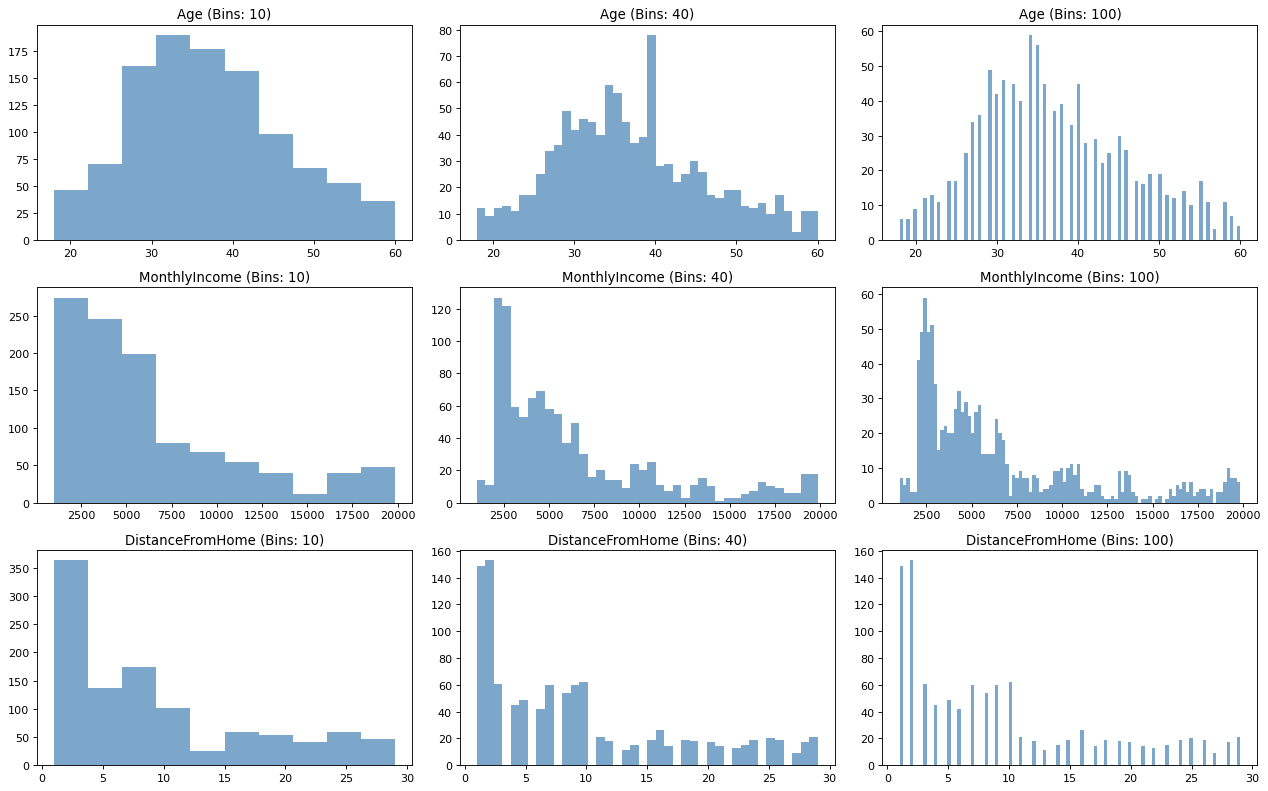

In [13]:
def display_histogram_subplot(df, col_names, bins_list):
    fig, axs = plt.subplots(ncols=len(bins_list), 
                            nrows=len(col_names), 
                            figsize=(16, 10), 
                            dpi=80)
    
    for i, bins in enumerate(bins_list):
        for j, col in enumerate(col_names):
            axs[j][i].set_title(f"{col} (Bins: {bins})")
            axs[j][i].hist(df[col], bins=bins, color='steelblue', alpha=0.7)
            
    plt.tight_layout()
    plt.show()

# Example usage:
bins = [10, 40, 100]
col_names = ["Age", "MonthlyIncome", "DistanceFromHome"]
display_histogram_subplot(df_train, col_names, bins)

**Which bin size is most sensible for each features? Why?**

*Age*: Divided into 10 bins, appears to follow a normal distribution.\
*MonthlyIncome*: Divided into 40 bins, others are either too coarse or too fine.\
*DistanceFromHome*: Divided into 10 bins, others have zero bins.

### T7. For the rest of the features, which one should be discretized in order to be modeled by histograms? What are the criteria for choosing whether we should discretize a feature or not? Answer this and discretize those features into 10 bins each. In other words, figure out the bin edge for each feature, then use digitize() to convert the features to discrete values

Using all features in df_train that has alraedy drop unnesscary features and encoded, except 'Attrition'

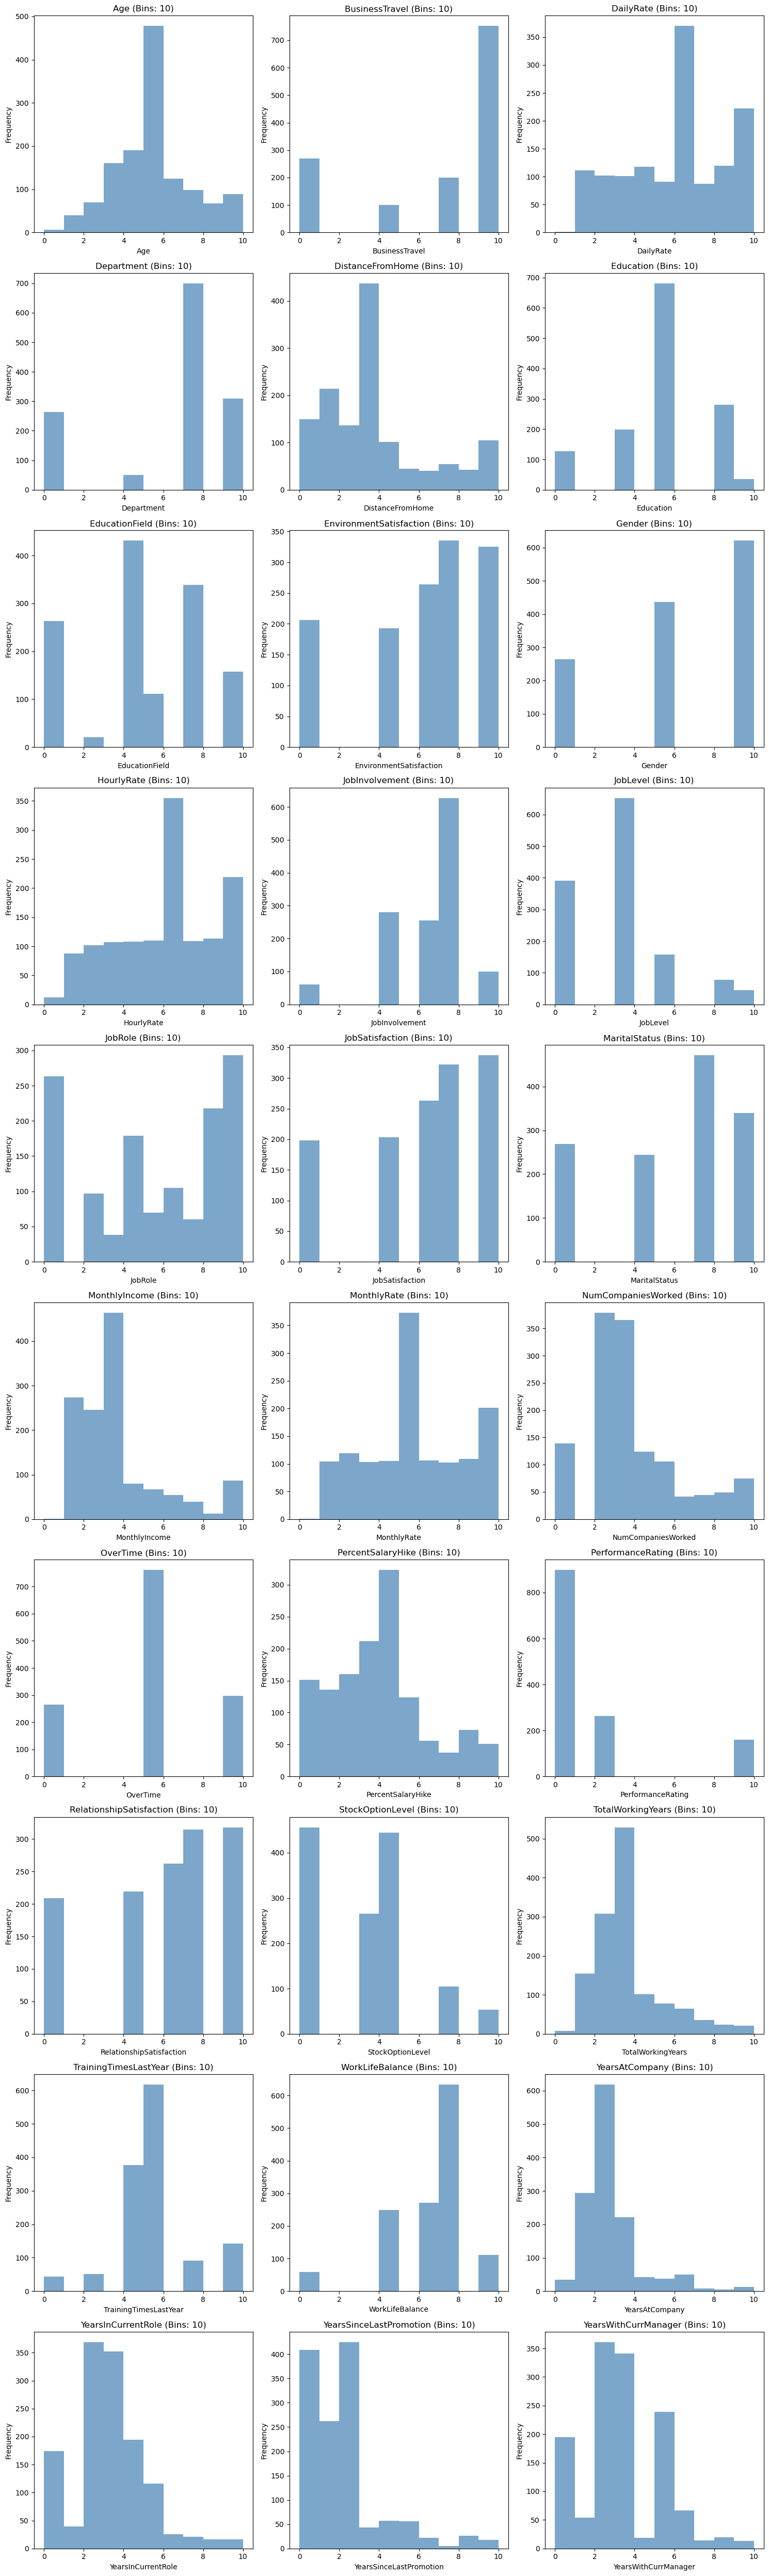

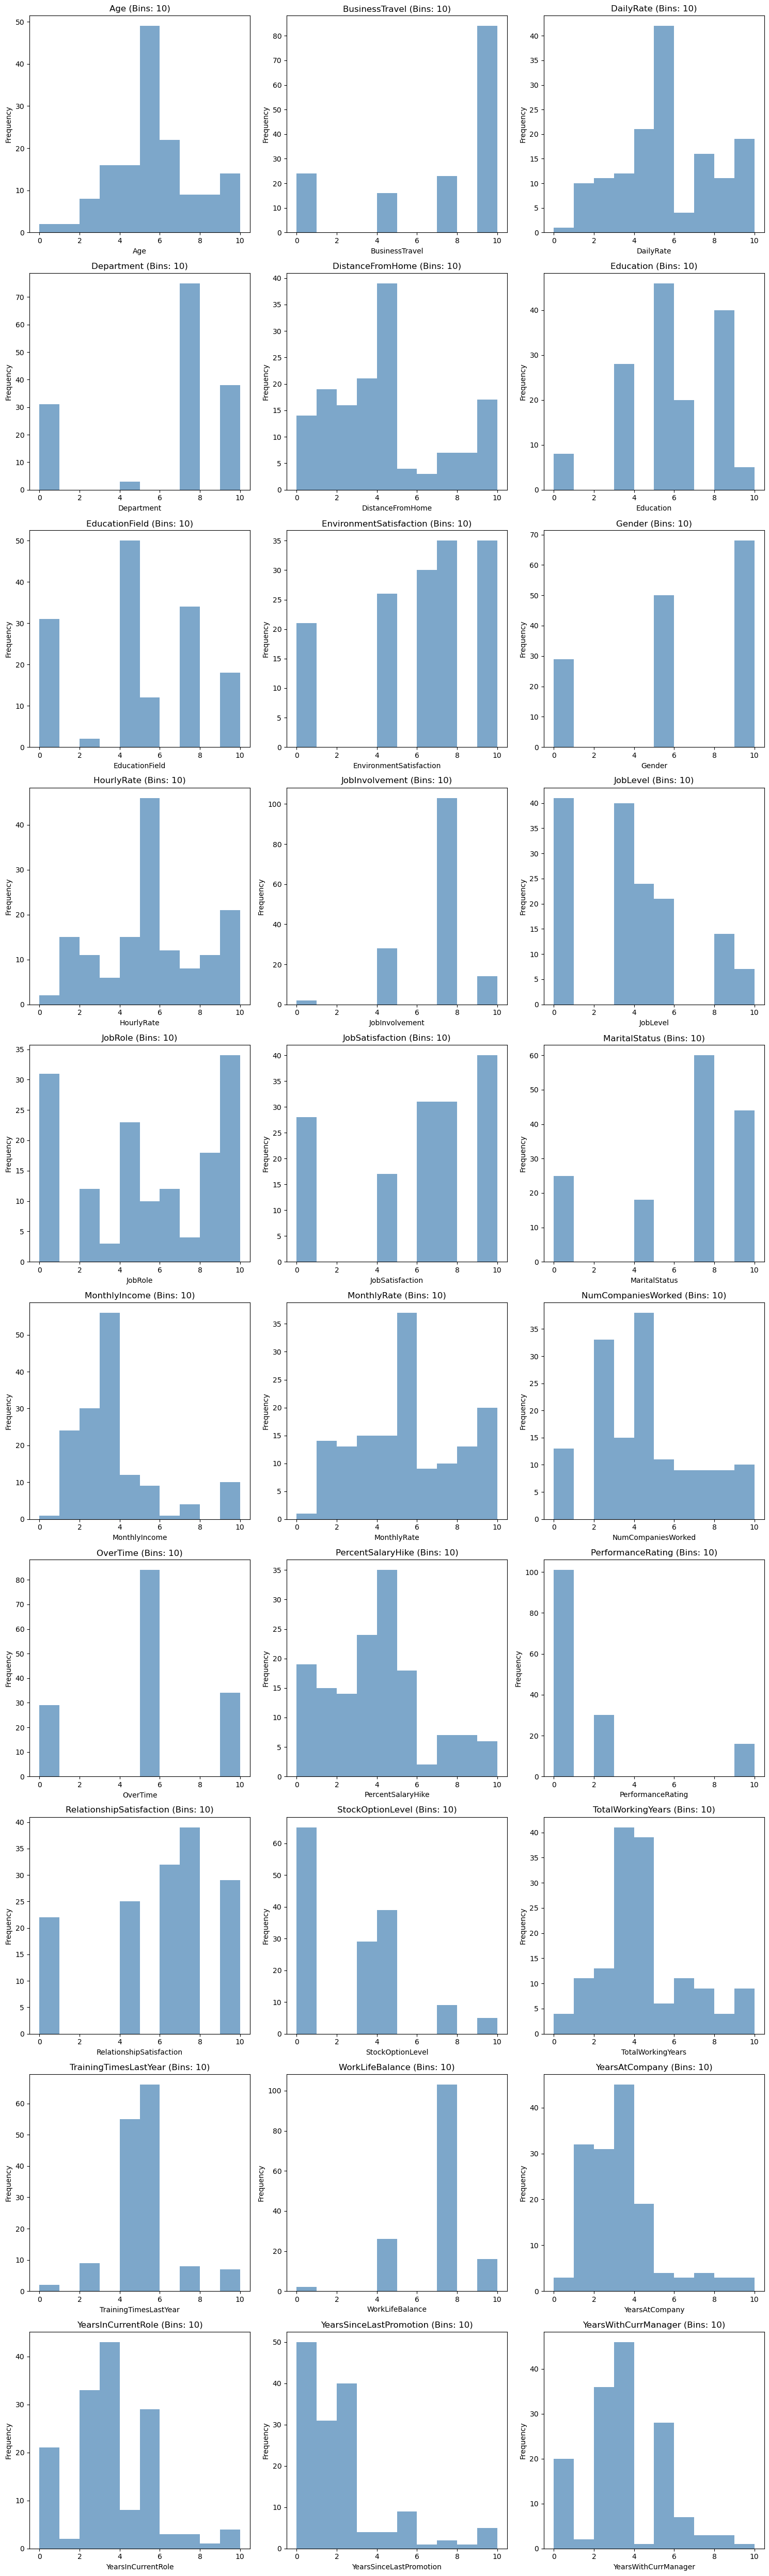

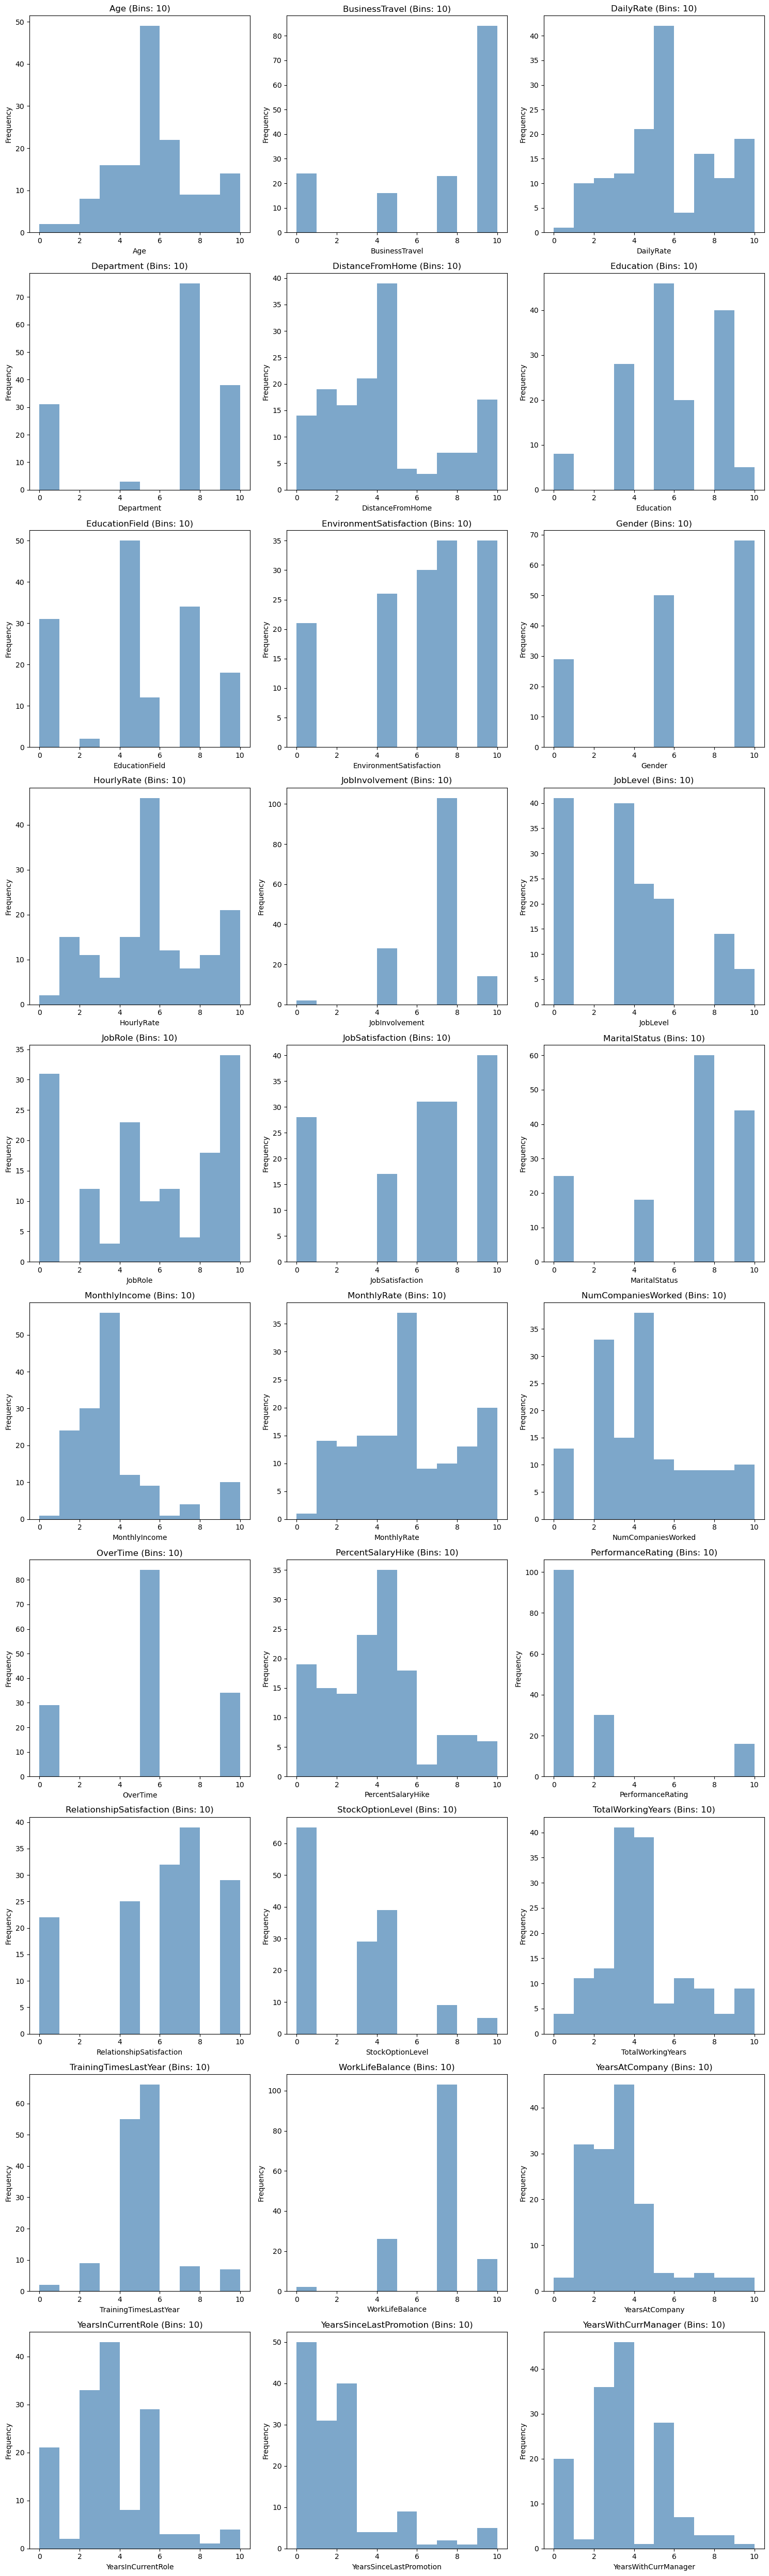

In [14]:
def plot_discretized_histograms(df, num_bins=10, show=True):
    """
    Plots and discretized histograms for each continuous feature in the DataFrame.
    ! Data transformation is applied

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the features.
    - num_bins (int): Number of bins to use for histogram calculation.
    - show (bool): Whether to display the plot. If False, returns the figure.

    Returns:
    None or plt.Figure: If show is False, returns the matplotlib figure.
    """

    # Identify features
    features = df.drop("Attrition", axis=1).columns

    # Calculate the number of rows needed based on the number of features and 3 columns
    num_rows = (len(features) + 2) // 3  # Adding 2 and using integer division

    # Create subplots
    fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

    # Flatten the axs array for easier indexing
    axs = axs.flatten()

    # Discretize each continuous feature and plot
    for i, feature in enumerate(features):
        # Check for NaN values and replace them with the mean
        df[feature].fillna(df[feature].mean(), inplace=True)

        # Compute bin edges
        bin_edges = np.histogram_bin_edges(df[feature], bins=num_bins)

        # Convert to discrete values using digitize
        df[feature] = np.digitize(df[feature], bin_edges, right=True)

        # Plot the histogram
        axs[i].hist(df[feature], bins=num_bins, color='steelblue', alpha=0.7)
        axs[i].set_title(f"{feature} (Bins: {num_bins})")
        axs[i].set_xlabel(feature)
        axs[i].set_ylabel("Frequency")

    # Remove empty subplots
    for i in range(len(features), len(axs)):
        fig.delaxes(axs[i])

    plt.tight_layout()

    if show:
        plt.show()
    else:
        return fig

# Example usage:
plot_discretized_histograms(df_train)
plot_discretized_histograms(df_test, show=False)

## The MLE for the likelihood distribution of discretized histograms

### T8. What kind of distribution should we use to model histograms? (Answer a distribution name) What is the MLE for the likelihood distribution? (Describe how to do the MLE). Plot the likelihood distributions of MonthlyIncome, JobRole, HourlyRate, and MaritalStatus for different Attrition values.

**What kind of distribution should we use to model histograms? (Answer a distribution name)**

Multinomial Distribution, multiple discrete outcomes, each with its own probability.

**What is the MLE for the likelihood distribution? (Describe how to do the MLE)**

$$p_j = P(x_j) = \frac{x_j}{n}$$
$$f(x_1, \ldots, x_n \mid p_1, \ldots, p_m ) = { n! \over \prod_{j=1}^m x_i ! } \prod_{j=1}^m p_j ^{x_j}$$

Log-Likelihood function of Multinomial

$$
\begin{array}{lcl}
loglik(p_1, \ldots, p_m) &=& log [ f(x_1, \ldots, x_m \mid p_1, \ldots, p_m )] \\
&=& log (n!) - \sum_{j=1}^m log( x_j !) + \sum_{j=1}^m x_j log(p_j) \\\end{array}
$$

- Maximum achieved when differential is zero

- Constraint: $\sum_{j=1}^m p_j =1$

- Apply method of Lagrange multipliers

$$\therefore\ \hat p_j = \frac{x_j}{n}\quad ;\ j=1,2,...,m$$

**Plot the likelihood distributions of MonthlyIncome, JobRole, HourlyRate, and MaritalStatus for different Attrition values.**

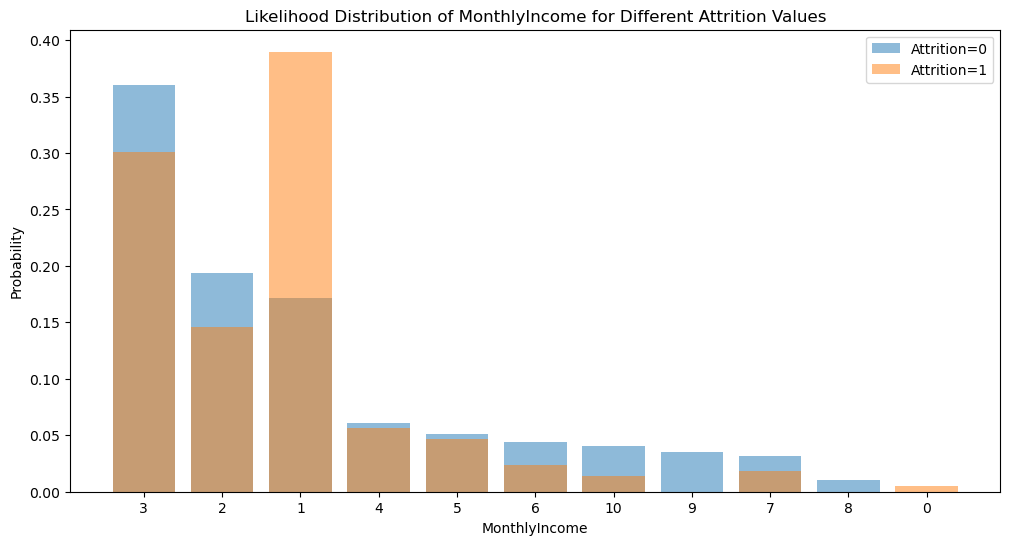

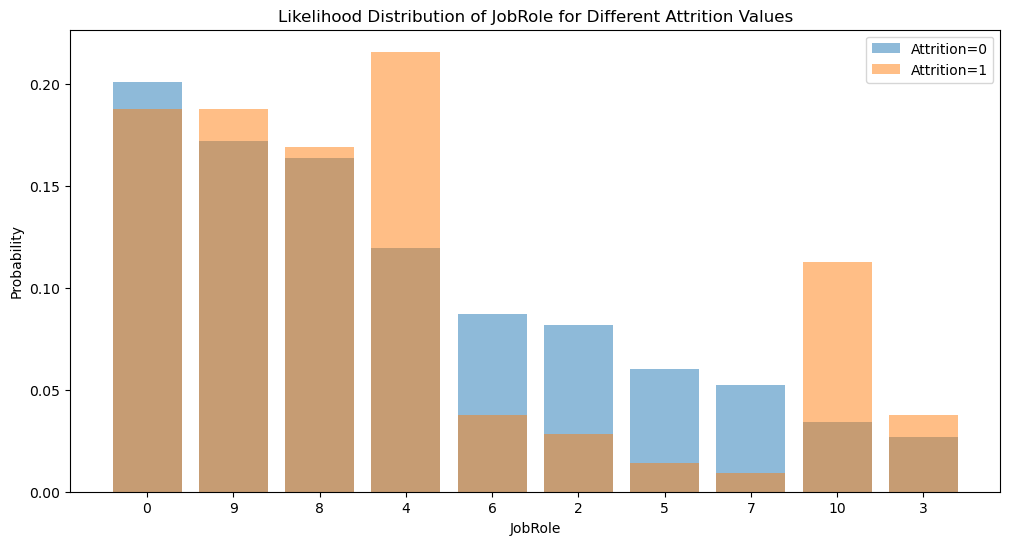

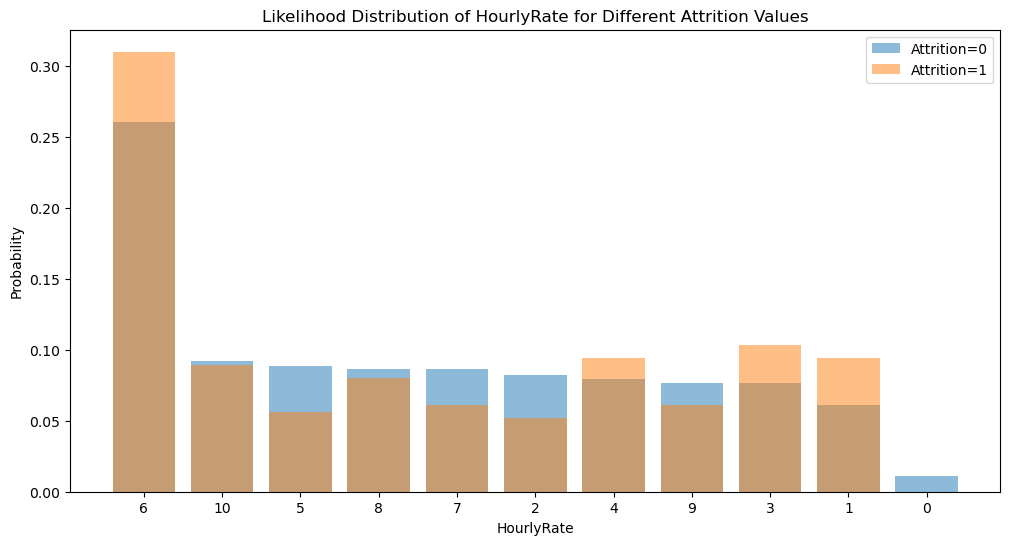

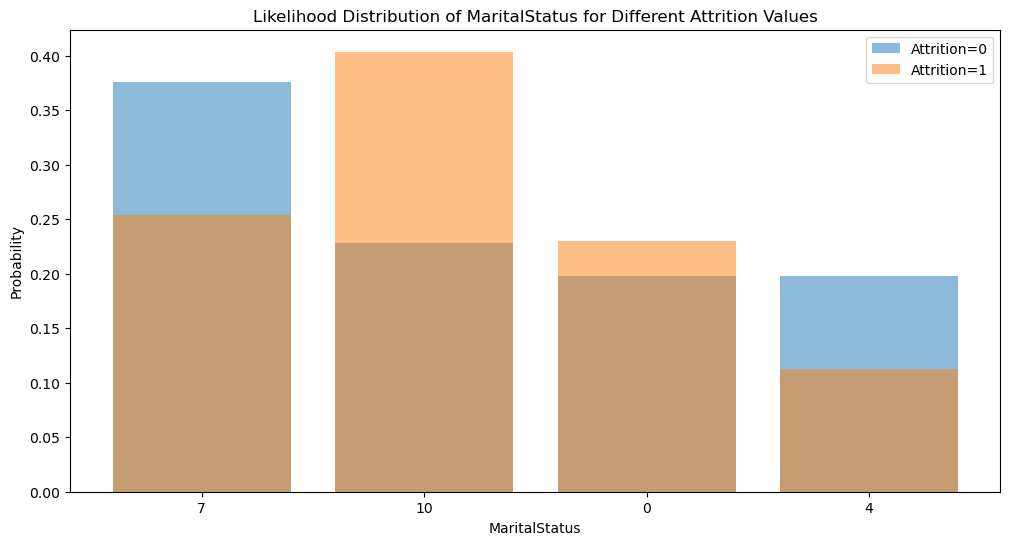

In [15]:
# Features to plot
features_to_plot = ["MonthlyIncome", "JobRole", "HourlyRate", "MaritalStatus"]

# Loop through each feature and plot likelihood distributions
for feature in features_to_plot:
    plt.figure(figsize=(12, 6))
    
    for attrition_value in df_train["Attrition"].unique():
        subset_data = df_train[df_train["Attrition"] == attrition_value][feature]
        category_counts = subset_data.value_counts()
        
        # Calculate MLE probabilities for each category
        mle_probabilities = category_counts / category_counts.sum()
        
        # Plot the likelihood distribution
        plt.bar(category_counts.index.astype(str), mle_probabilities, label=f'Attrition={attrition_value}', alpha=0.5)

    plt.title(f"Likelihood Distribution of {feature} for Different Attrition Values")
    plt.xlabel(feature)
    plt.ylabel("Probability")
    plt.legend()
    plt.show()


### T9. What is the prior distribution of the two classes?

In [16]:
# Calculate prior
def calculate_prior(df, cls):
  return df.loc[df["Attrition"] == cls, "Attrition"].count() / df.shape[0]

priorClass0 = calculate_prior(df_train, 0)
priorClass1 = calculate_prior(df_train, 1)
print(f"Prior class 0: {priorClass0}")
print(f"Prior class 1: {priorClass1}")

Prior class 0: 0.8390022675736961
Prior class 1: 0.16099773242630386


## Naive Bayes classification

### T10. If we use the current Naive Bayes with our current Maximum Likelihood Estimates, we will find that some P (x i |attrition) will be zero and will result in the entire product term to be zero. Propose a method to fix this problem.

3 solutions
1. Use a very small value instead of zero (flooring)
2. Smooth the values using counts from other observations (smoothing)
3. Use priors (MAP adaptation)

In [17]:
def apply_flooring_np(arr, epsilon=1e-10):
    """
    Apply flooring to replace zero values in a NumPy array with a small epsilon value.

    Parameters:
    - arr (np.ndarray): The NumPy array containing probabilities.
    - epsilon (float): The small value to replace zero.

    Returns:
    - arr_floored (np.ndarray): The NumPy array with zero values replaced by epsilon.
    """
    return np.where(arr == 0, epsilon, arr)

### T11. Implement your Naive Bayes classifier. Use the learned distributions to classify the test set. Don’t forget to allow your classifier to handle missing values in the test set. Report the overall Accuracy. Then, report the Precision, Recall, and F score for detecting attrition. See Lecture 1 for the definitions of each metric.


In [18]:
from SimpleBayesClassifier import SimpleBayesClassifier

In [19]:
selected_columns = ['MonthlyIncome', 'JobRole', 'HourlyRate', 'MaritalStatus']

x_train = df_train.drop(columns='Attrition').to_numpy() # all features
# x_train = df_train[selected_columns].to_numpy()
x_train = apply_flooring_np(x_train)
y_train = df_train["Attrition"].to_numpy()

x_test = df_test.drop(columns='Attrition').to_numpy() # all features
# x_test = df_test[selected_columns].to_numpy()
x_test = apply_flooring_np(x_test)
y_test = df_test["Attrition"].to_numpy()


In [20]:
n_pos = np.count_nonzero(y_train == 1)
n_neg = np.count_nonzero(y_train == 0)

model = SimpleBayesClassifier(n_pos=n_pos, n_neg=n_neg)

In [21]:
def check_prior():
    """
    This function designed to test the implementation of the prior probability calculation in a Naive Bayes classifier. 
    Specifically, it checks if the classifier correctly computes the prior probabilities for the 
    negative and positive classes based on given input counts.
    """
    
    # prior_neg = 5/(5 + 5) = 0.5 and # prior_pos = 5/(5 + 5) = 0.5
    assert (SimpleBayesClassifier(5, 5).prior_pos, SimpleBayesClassifier(5, 5).prior_neg) == (0.5, 0.5)

    # assert (SimpleBayesClassifier(3, 5).prior_pos, SimpleBayesClassifier(3, 5).prior_neg) ==
    # assert (SimpleBayesClassifier(0, 1).prior_pos, SimpleBayesClassifier(0, 1).prior_neg) ==
    # assert (SimpleBayesClassifier(1, 0).prior_pos, SimpleBayesClassifier(1, 0).prior_neg) ==
    
check_prior()

In [22]:
model.fit_params(x_train, y_train)

([(array([0.02162162, 0.04414414, 0.11711712, 0.14324324, 0.36846847,
          0.1045045 , 0.07927928, 0.05315315, 0.04324324, 0.02522523]),
   array([-inf,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  inf])),
  (array([0.20540541, 0.        , 0.        , 0.08378378, 0.        ,
          0.        , 0.13513514, 0.        , 0.        , 0.57567568]),
   array([-inf,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  inf])),
  (array([0.0960961 , 0.07807808, 0.08708709, 0.1001001 , 0.07707708,
          0.3033033 , 0.07707708, 0.1021021 , 0.1031031 , 0.08708709]),
   array([-inf,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1,  inf])),
  (array([0.1963964 , 0.        , 0.        , 0.03693694, 0.        ,
          0.        , 0.54504505, 0.        , 0.        , 0.22162162]),
   array([-inf,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  inf])),
  (array([0.28558559, 0.10540541, 0.33693694, 0.07477477, 0.03063063,
          0.02702703, 0.04054054, 0.02882883, 

In [23]:
def check_fit_params():

    """
    This function is designed to test the fit_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is bins and edges from each histogram.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {STAY_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {STAY_PARAMS_1[f_idx][1]}")
    print("")    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {LEAVE_PARAMS_1[f_idx][1]}")

check_fit_params()

STAY PARAMETERS
Feature : 0
BINS : [2.5 0.  0.  0.  0.  0.  0.  0.  0.  2.5]
EDGES : [-inf  0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  inf]
Feature : 1
BINS : [2.5 0.  0.  0.  0.  0.  0.  0.  0.  2.5]
EDGES : [-inf  1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  inf]
Feature : 2
BINS : [2.5 0.  0.  0.  0.  0.  0.  0.  0.  2.5]
EDGES : [-inf  2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  inf]
Feature : 3
BINS : [2.5 0.  0.  0.  0.  0.  0.  0.  0.  2.5]
EDGES : [-inf  3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  inf]

LEAVE PARAMETERS
Feature : 0
BINS : [2.5 0.  0.  0.  0.  0.  0.  0.  0.  2.5]
EDGES : [-inf  1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  inf]
Feature : 1
BINS : [2.5 0.  0.  0.  0.  0.  0.  0.  0.  2.5]
EDGES : [-inf  2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  inf]
Feature : 2
BINS : [2.5 0.  0.  0.  0.  0.  0.  0.  0.  2.5]
EDGES : [-inf  3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  inf]
Feature : 3
BINS : [2.5 0.  0.  0.  0.  0.  0.  0.  0.  2.5]
EDGES : [-inf  4.2  4.4

In [24]:
y_pred = model.predict(x=x_test)

In [41]:
def evaluate(y_test, y_pred, show_result=True):
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)
    
    # Mask NaN values
    nan_mask = ~np.isnan(y_test) & ~np.isnan(y_pred)
    y_test = y_test[nan_mask]
    y_pred = y_pred[nan_mask]
    
    # Calculate True Positives, True Negatives, False Positives, False Negatives
    tp = sum((y_test == 1) & (y_pred == 1)) # Use 1(leave) as Positive(+) class
    tn = sum((y_test == 0) & (y_pred == 0)) # Use 0(stay) as Negative(-) class
    fp = sum((y_test == 0) & (y_pred == 1))
    fn = sum((y_test == 1) & (y_pred == 0)) 

    # Calculate evaluation metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn)!=0 else (tp + tn)/1e-10
    precision = tp / (tp + fp) if (tp + fp) != 0 else tp / 1e-10
    recall = tp / (tp + fn) if (tp + fn) != 0 else tp / 1e-10
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else (2 * precision * recall) / 1e-10
    false_positive_rate = fp / (fp + tn) if (fp + tn) != 0 else fp / 1e-10

    if show_result:
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1 Score:", f1)
        print("False Positive Rate:", false_positive_rate)
        
    return accuracy, precision, recall, f1, false_positive_rate

In [42]:
evaluate(y_test, y_pred)

Accuracy: 0.41496598639455784
Precision: 0.12195121951219512
Recall: 0.4166666666666667
F1 Score: 0.18867924528301888
False Positive Rate: 0.5853658536585366


(0.41496598639455784,
 0.12195121951219512,
 0.4166666666666667,
 0.18867924528301888,
 0.5853658536585366)

### T12. Use the learned distributions to classify the test set. Report the results using the same metric as the previous question.


In [27]:
model.fit_gaussian_params(x_train, y_train)

([(5.1216216216219825, 1.896079663690412),
  (7.037837837858379, 3.9998210332136908),
  (5.646846846846847, 2.612093145001865),
  (6.179279279298919, 3.3581048150388924),
  (3.18828828829973, 2.5630161967738347),
  (5.028828828838198, 2.366256304489039),
  (4.692792792812433, 2.958914206462426),
  (6.109909909924505, 3.1811085085323296),
  (6.324324324344415, 3.861713576952009),
  (5.681081081082162, 2.6109786751450543),
  (6.180180180183694, 1.9636250637316426),
  (3.0666666666924325, 2.5046023702126856),
  (5.118918918939009, 3.3697518691866386),
  (6.1252252252397295, 3.210847842551065),
  (5.701801801821622, 3.444056951447781),
  (3.4351351351351354, 2.3192942639172363),
  (5.3324324324325225, 2.5504517233583175),
  (3.3675675675785586, 2.3206927422472705),
  (4.95045045047018, 3.100751837709882),
  (3.54864864865964, 2.361262636140796),
  (1.5891891892572971, 3.1884744961563714),
  (5.990990991005946, 3.197396168916343),
  (3.065765765796486, 2.5429994170341543),
  (3.252252252252

In [28]:
def check_fit_gaussian_params():

    """
    This function is designed to test the fit_gaussian_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is mean and STD.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_gaussian_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {STAY_PARAMS_1[f_idx][0]}")
        print(f"STD. : {STAY_PARAMS_1[f_idx][1]}")
    print("")    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"STD. : {LEAVE_PARAMS_1[f_idx][1]}")
    
check_fit_gaussian_params()

STAY PARAMETERS
Feature : 0
Mean : 1.0
STD. : 1.0
Feature : 1
Mean : 2.0
STD. : 1.0
Feature : 2
Mean : 3.0
STD. : 1.0
Feature : 3
Mean : 4.0
STD. : 1.0

LEAVE PARAMETERS
Feature : 0
Mean : 2.0
STD. : 1.0
Feature : 1
Mean : 3.0
STD. : 1.0
Feature : 2
Mean : 4.0
STD. : 1.0
Feature : 3
Mean : 5.0
STD. : 1.0


In [29]:
y_pred = model.gaussian_predict(x_test)

In [45]:
evaluate(y_test, y_pred)

Accuracy: 0.41496598639455784
Precision: 0.12195121951219512
Recall: 0.4166666666666667
F1 Score: 0.18867924528301888
False Positive Rate: 0.5853658536585366


(0.41496598639455784,
 0.12195121951219512,
 0.4166666666666667,
 0.18867924528301888,
 0.5853658536585366)

## Baseline comparison

### T13 : The random choice baseline is the accuracy if you make a random guess for each test sample. Give random guess (50% leaving, and 50% staying) to the test samples. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the random choice baseline.

In [44]:
def random_choice_baseline(y_test):
    # Generate random predictions
    y_random_pred = np.random.randint(2, size=len(y_test))
    
    # Evaluate the random predictions
    evaluate(y_test, y_random_pred)

# Assuming y_test contains the true labels for the test samples
random_choice_baseline(y_test)


Accuracy: 0.48299319727891155
Precision: 0.15789473684210525
Recall: 0.5
F1 Score: 0.23999999999999996
False Positive Rate: 0.5203252032520326


### T14. The majority rule is the accuracy if you use the most frequent class from the training set as the classification decision. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the majority rule baseline.



In [43]:
def majority_rule_baseline(y_train, y_test):
    # Determine the most frequent class in the training set
    majority_class = np.argmax(np.bincount(y_train))
    
    # Generate predictions using the majority class
    y_pred = np.full_like(y_test, fill_value=majority_class)
    
    # Evaluate the predictions
    evaluate(y_test, y_pred)

# Assuming y_train contains the true labels for the training set
# and y_test contains the true labels for the test set
majority_rule_baseline(y_train, y_test)

Accuracy: 0.8367346938775511
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
False Positive Rate: 0.0


### T15. Compare the two baselines with your Naive Bayes classifier.

In [39]:
# Make predictions using your Naive Bayes classifier
y_pred_nonparametric = model.predict(x_test)
y_pred_parametric = model.gaussian_predict(x_test)

# Evaluate the predictions from your Naive Bayes classifier
print("Non Parametric:")
evaluate(y_test, y_pred_nonparametric)

# Evaluate the predictions from your Naive Bayes classifier
print("\nParametric:")
evaluate(y_test, y_pred_parametric)

# Evaluate the random choice baseline
print("\nRandom Choice Baseline:")
random_choice_baseline(y_test)

# Evaluate the majority rule baseline
print("\nMajority Rule Baseline:")
majority_rule_baseline(y_train, y_test)


Non Parametric:
Accuracy: 0.7687074829931972
Precision: 0.32142857142857145
Recall: 0.375
F1 Score: 0.3461538461538462
False Positive Rate: 0.15447154471544716

Parametric:
Accuracy: 0.8095238095238095
Precision: 0.4
Recall: 0.3333333333333333
F1 Score: 0.3636363636363636
False Positive Rate: 0.0975609756097561

Random Choice Baseline:
Accuracy: 0.4965986394557823
Precision: 0.16216216216216217
Recall: 0.5
F1 Score: 0.2448979591836735
False Positive Rate: 0.5040650406504065

Majority Rule Baseline:
Accuracy: 0.8367346938775511
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
False Positive Rate: 0.0


## Threshold finding

### T16. Use the following threshold values
$ t = np.arange(-5,5,0.05) $
### find the best accuracy, and F score (and the corresponding thresholds)


In [46]:
import numpy as np

# Define the range of threshold values
thresholds = np.arange(-5, 5, 0.05)

best_accuracy = 0
best_accuracy_threshold = None

best_f_score = 0
best_f_score_threshold = None

# Iterate over the threshold values
for threshold in thresholds:
    # Make predictions using the non-parametric model
    y_pred_nonparametric = model.predict(x_test, thresh=threshold)
    
    # Make predictions using the parametric model
    y_pred_parametric = model.gaussian_predict(x_test, thresh=threshold)
    
    # Evaluate the predictions from the non-parametric model
    accuracy_nonparametric, _, _, _, f_score_nonparametric = evaluate(y_test, y_pred_nonparametric, show_result=False)
    
    # Evaluate the predictions from the parametric model
    accuracy_parametric, _, _, _, f_score_parametric = evaluate(y_test, y_pred_parametric, show_result=False)
    
    # Update the best accuracy and corresponding threshold if applicable
    if accuracy_nonparametric > best_accuracy:
        best_accuracy = accuracy_nonparametric
        best_accuracy_threshold = threshold
    
    # Update the best F-score and corresponding threshold if applicable
    if f_score_nonparametric > best_f_score:
        best_f_score = f_score_nonparametric
        best_f_score_threshold = threshold

# Print the best accuracy and corresponding threshold
print("Best Accuracy (Non-parametric):", best_accuracy)
print("Corresponding Threshold (Non-parametric):", best_accuracy_threshold)

# Print the best F-score and corresponding threshold
print("\nBest F-score (Non-parametric):", best_f_score)
print("Corresponding Threshold (Non-parametric):", best_f_score_threshold)


Best Accuracy (Non-parametric): 0.8571428571428571
Corresponding Threshold (Non-parametric): 2.849999999999972

Best F-score (Non-parametric): 0.8373983739837398
Corresponding Threshold (Non-parametric): -5.0


### T17. Plot the RoC of your classifier.

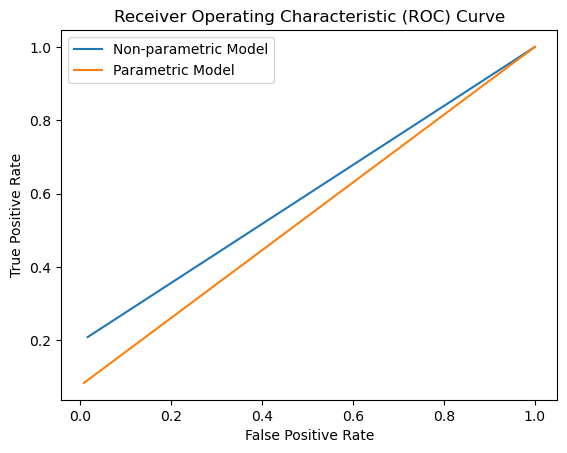

In [51]:
y_pred_nonparametric = model.predict(x_test, thresh=best_accuracy_threshold)    
y_pred_parametric = model.gaussian_predict(x_test, thresh=best_accuracy_threshold)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Obtain predicted probabilities of the positive class
y_scores = model.predict_proba(x_test)  # Assuming 'model' is your trained classifier

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### T18. Change the number of discretization bins to 5. What happens to the RoC curve? Which discretization is better? The number of discretization bins can be considered as a hyperparameter, and must be chosen by comparing the final performance.
